In [1]:
!pip install spektral

     |████████████████████████████████| 102kB 3.9MB/s 


# st-GCN

In [2]:
%tensorflow_version 2.1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.optimizers import Adam,SGD,schedules
from tensorflow.keras.regularizers import l2
from spektral.datasets import mnist
from spektral.layers import GraphConv,diff_pool,GlobalAvgPool
from spektral.layers.ops import sp_matrix_to_sp_tensor
import pickle
tf.compat.v1.disable_eager_execution()
import numpy as np


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.1`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [3]:
def load_data():
  X=np.load("/content/drive/My Drive/datasets/kinetic_preprocessed/Train.npz.npy")
  Y=pickle.load(open("/content/drive/My Drive/datasets/kinetic_preprocessed/Train_labels.pkl","rb"))
  adj=pickle.load(open("/content/drive/My Drive/datasets/kinetic_preprocessed/graph1.pkl","rb"))
  return adj,X,Y


In [4]:
l2_reg = 5e-4         # Regularization rate for l2
learning_rate = 1e-3  # Learning rate for SGD
batch_size =32      # Batch size
epochs =50      # Number of training epochs
es_patience = 50    # Patience fot early stopping

In [5]:
A,X,Y=load_data()

In [6]:
A=A.to_numpy()

In [7]:
X=X.reshape(X.shape[0],X.shape[3],X.shape[1]*X.shape[2])


In [8]:
X.shape

(248, 18, 900)

In [9]:
N=X.shape[1]
F=X.shape[2]
n_out=13

In [10]:
from sklearn.preprocessing import LabelBinarizer


In [11]:
label=LabelBinarizer()
y=label.fit_transform(Y)
y

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [12]:
y.shape

(247, 5)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X[:247],y,test_size=0.2,random_state=42)

In [ ]:
y_train

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0,

In [ ]:
fltr =GraphConv.preprocess(A).astype('f4')
X_in=Input(shape=(N,F))
A_in=Input(tensor=sp_matrix_to_sp_tensor(fltr))
gcn1=GraphConv(64,activation='elu',use_bias=False,kernel_regularizer=l2(l2_reg))([X_in,A_in])
gcn2=GraphConv(64,activation='elu',use_bias=False,kernel_regularizer=l2(l2_reg))([gcn1,A_in])
gcn3=GraphConv(64,activation='elu',use_bias=False,kernel_regularizer=l2(l2_reg))([gcn2,A_in])
gcn4=GraphConv(128,activation='elu',use_bias=False,kernel_regularizer=l2(l2_reg))([gcn3,A_in])
gcn5=GraphConv(128,activation='elu',use_bias=False,kernel_regularizer=l2(l2_reg))([gcn4,A_in])
gcn6=GraphConv(128,activation='elu',use_bias=False,kernel_regularizer=l2(l2_reg))([gcn5,A_in])
gcn7=GraphConv(256,activation='elu',use_bias=False,kernel_regularizer=l2(l2_reg))([gcn6,A_in])
gcn8=GraphConv(256,activation='elu',use_bias=False,kernel_regularizer=l2(l2_reg))([gcn7,A_in])
gcn9=GraphConv(256,activation='elu',use_bias=False,kernel_regularizer=l2(l2_reg))([gcn8,A_in])
globe=GlobalAvgPool()(gcn9)
dense=Dense(5,activation="softmax")(globe)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model=Model(inputs=[X_in,A_in],outputs=dense)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 18, 900)]    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(18, 18)]           0                                            
__________________________________________________________________________________________________
graph_conv (GraphConv)          (None, 18, 64)       57600       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
graph_conv_1 (GraphConv)        (None, 18, 64)       4096        graph_conv[0][0]             

In [ ]:
model.compile(optimizer=Adam(learning_rate),loss='categorical_crossentropy',metrics=["acc"])

In [ ]:
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=100,validation_data=(x_test,y_test),callbacks=[EarlyStopping(patience=es_patience,restore_best_weights=True)],shuffle=True)

Train on 197 samples, validate on 50 samples
Epoch 1/100
197/197 [==============================] - 0s 890us/sample - loss: 33.6028 - acc: 0.1929 - val_loss: 54.4380 - val_acc: 0.2600
Epoch 2/100
197/197 [==============================] - 0s 376us/sample - loss: 31.9686 - acc: 0.3046 - val_loss: 17.6913 - val_acc: 0.2000
Epoch 3/100
197/197 [==============================] - 0s 364us/sample - loss: 9.6083 - acc: 0.4010 - val_loss: 10.3367 - val_acc: 0.2800
Epoch 4/100
197/197 [==============================] - 0s 368us/sample - loss: 6.4167 - acc: 0.4416 - val_loss: 11.0791 - val_acc: 0.2400
Epoch 5/100
197/197 [==============================] - 0s 396us/sample - loss: 6.0629 - acc: 0.4975 - val_loss: 8.4121 - val_acc: 0.3000
Epoch 6/100
197/197 [==============================] - 0s 402us/sample - loss: 4.0122 - acc: 0.7056 - val_loss: 8.7943 - val_acc: 0.3200
Epoch 7/100
197/197 [==============================] - 0s 393us/sample - loss: 2.9747 - acc: 0.6954 - val_loss: 10.2070 - val_a

Text(0, 0.5, 'percent')

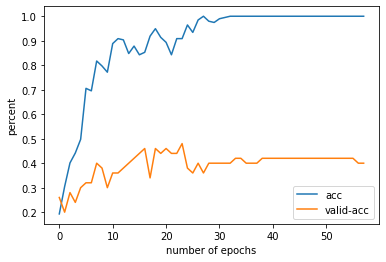

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='valid-acc')
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel("percent")


Text(0, 0.5, 'percent')

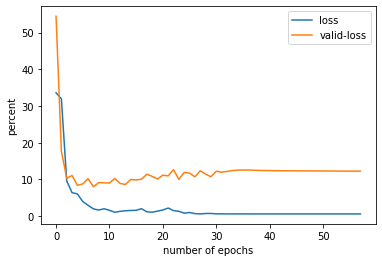

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='valid-loss')
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel("percent")

In [ ]:
pred=model.predict(x_test)

In [ ]:
pred

array([[4.25647828e-09, 8.71933821e-07, 1.25724600e-05, 9.99933720e-01,
        5.29075551e-05],
       [1.10459965e-16, 1.78041226e-08, 2.45609793e-13, 9.99980927e-01,
        1.90591218e-05],
       [2.06192563e-10, 5.07657205e-05, 9.96096909e-01, 3.85233038e-03,
        1.67289771e-09],
       [1.97287181e-06, 8.74942101e-23, 4.18153241e-19, 9.99996662e-01,
        1.32634875e-06],
       [5.97338243e-19, 3.30810791e-12, 1.00000000e+00, 1.86058016e-10,
        2.59429522e-09],
       [1.83989618e-18, 1.03096698e-10, 1.00000000e+00, 1.96237115e-09,
        3.58280555e-22],
       [2.67132378e-08, 3.91515800e-17, 1.00000000e+00, 2.43554638e-11,
        1.26969008e-16],
       [9.97595012e-01, 2.48958579e-11, 6.82956903e-12, 2.14827084e-03,
        2.56757456e-04],
       [2.13199440e-13, 7.90829491e-03, 9.91230249e-01, 8.61325825e-04,
        7.74580187e-08],
       [1.74930758e-15, 9.99989271e-01, 9.04204782e-08, 1.06139869e-05,
        1.79367551e-16],
       [3.26602599e-11, 3.1751

In [ ]:
model.save("gcn.h5")

In [ ]:
y_pred=np.argmax(pred,axis=1)
y_test=np.argmax(y_test,axis=1)


In [ ]:
y_pred

array([3, 3, 2, 3, 2, 2, 2, 0, 2, 1, 3, 4, 3, 3, 4, 4, 3, 0, 0, 3, 3, 3,
       3, 4, 3, 3, 1, 1, 1, 4, 3, 3, 2, 3, 2, 3, 3, 2, 4, 2, 3, 4, 0, 3,
       2, 3, 0, 2, 3, 4])

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


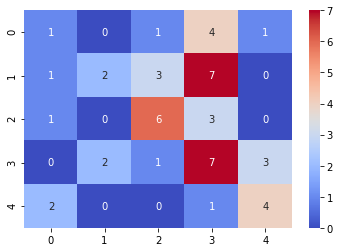

In [ ]:
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,cmap='coolwarm',linecolor='white',annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.20      0.14      0.17         7
           1       0.50      0.15      0.24        13
           2       0.55      0.60      0.57        10
           3       0.32      0.54      0.40        13
           4       0.50      0.57      0.53         7

    accuracy                           0.40        50
   macro avg       0.41      0.40      0.38        50
weighted avg       0.42      0.40      0.38        50



#AGCN

In [ ]:
fltr =GraphConv.preprocess(A).astype('f4')

# Model definition
X_in = Input(shape=(N, F))
# Pass A as a fixed tensor, otherwise Keras will complain about inputs of
# different rank.
A_in = Input(tensor=sp_matrix_to_sp_tensor(fltr))

graph_conv_1 = GraphConv(64,
                       activation='relu',
                       kernel_regularizer=l2(l2_reg),
                       use_bias=False)([X_in, A_in])
batch1=keras.layers.BatchNormalization()(graph_conv_1)
drop1=Dropout(0.5)(batch1)
graph_conv_2 = GraphConv(64,
                       activation='relu',
                       kernel_regularizer=l2(l2_reg),
                       use_bias=False)([drop1, A_in])
batch2=keras.layers.BatchNormalization()(graph_conv_2)
add1=keras.layers.Add()([batch2,graph_conv_1])
graph_conv_3 = GraphConv(128,
                       activation='relu',
                       kernel_regularizer=l2(l2_reg),
                       use_bias=False)([add1, A_in])
batch3=keras.layers.BatchNormalization()(graph_conv_3)
drop2=Dropout(0.5)(batch3)
graph_conv_4 = GraphConv(128,
                       activation='relu',
                       kernel_regularizer=l2(l2_reg),
                       use_bias=False)([drop2, A_in])
batch4=keras.layers.BatchNormalization()(graph_conv_4)
add2=keras.layers.Add()([batch4,graph_conv_3])
graph_conv_5 = GraphConv(256,
                       activation='relu',
                       kernel_regularizer=l2(l2_reg),
                       use_bias=False)([add1, A_in])
batch3=keras.layers.BatchNormalization()(graph_conv_5)
drop2=Dropout(0.5)(batch3)
graph_conv_6 = GraphConv(256,
                       activation='relu',
                       kernel_regularizer=l2(l2_reg),
                       use_bias=False)([drop2, A_in])
batch5=keras.layers.BatchNormalization()(graph_conv_6)
add3=keras.layers.Add()([batch5,graph_conv_5])

flatten =tf.keras.layers.GlobalAveragePooling1D()(add3)
output = Dense(14, activation='softmax')(flatten)


In [ ]:
model=Model(inputs=[X_in,A_in],outputs=output)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 18, 900)]    0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(18, 18)]           0                                            
__________________________________________________________________________________________________
graph_conv_24 (GraphConv)       (None, 18, 64)       57600       input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_6 (BatchNor (None, 18, 64)       256         graph_conv_24[0][0]        

In [ ]:
lr_sched=keras.optimizers.schedules.ExponentialDecay(0.01,decay_steps=1000,decay_rate=1e-4,staircase=True)
model.compile(optimizer=SGD(lr_sched,momentum=0.9,nesterov=True),loss='categorical_crossentropy',metrics=["acc"])


In [ ]:
checkpoint=keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
earlystopping=EarlyStopping(patience=es_patience,restore_best_weights=True)
callbacks=[checkpoint,earlystopping]

In [ ]:
history=model.fit(x_train,y_train,batch_size=64,epochs=100,validation_data=(x_test,y_test),callbacks=callbacks,shuffle=True)

Train on 548 samples, validate on 138 samples
Epoch 1/100
548/548 [==============================] - 1s 2ms/sample - loss: 3.1641 - acc: 0.0821 - val_loss: 3.0437 - val_acc: 0.0797
Epoch 2/100
548/548 [==============================] - 0s 351us/sample - loss: 2.9646 - acc: 0.1022 - val_loss: 2.9180 - val_acc: 0.1232
Epoch 3/100
548/548 [==============================] - 0s 345us/sample - loss: 2.8632 - acc: 0.1150 - val_loss: 2.9043 - val_acc: 0.1377
Epoch 4/100
548/548 [==============================] - 0s 343us/sample - loss: 2.8036 - acc: 0.1369 - val_loss: 2.8722 - val_acc: 0.1522
Epoch 5/100
548/548 [==============================] - 0s 336us/sample - loss: 2.7347 - acc: 0.1569 - val_loss: 2.8560 - val_acc: 0.1377
Epoch 6/100
548/548 [==============================] - 0s 281us/sample - loss: 2.6909 - acc: 0.1898 - val_loss: 2.8661 - val_acc: 0.1667
Epoch 7/100
548/548 [==============================] - 0s 364us/sample - loss: 2.6110 - acc: 0.2336 - val_loss: 2.8158 - val_acc: 0.17

Text(0, 0.5, 'percent')

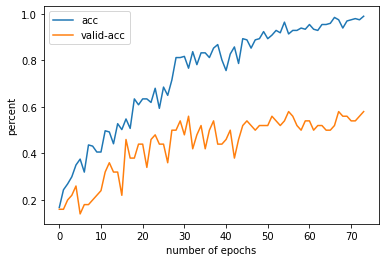

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='valid-acc')
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel("percent")


Text(0, 0.5, 'percent')

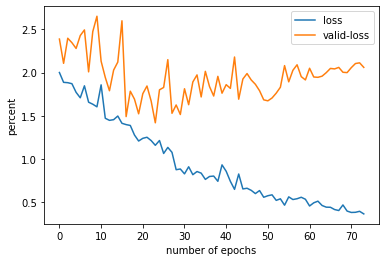

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='valid-loss')
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel("percent")

In [ ]:
pred=model.predict(x_test)

In [ ]:
model.evaluate(x_test,y_test)

[1.4186865425109862, 0.48]

In [ ]:
y_pred=np.argmax(pred,axis=1)
y_test=np.argmax(y_test,axis=1)


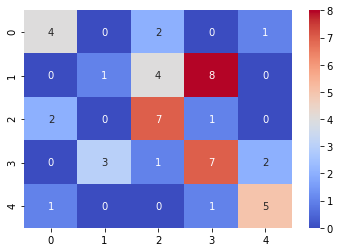

In [ ]:
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,cmap='coolwarm',linecolor='white',annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.25      0.08      0.12        13
           2       0.50      0.70      0.58        10
           3       0.41      0.54      0.47        13
           4       0.62      0.71      0.67         7

    accuracy                           0.48        50
   macro avg       0.47      0.52      0.48        50
weighted avg       0.44      0.48      0.44        50



# Edge_convolotion

In [ ]:
Bones=[]
for i in range(X.shape[0]):
  for j in range(1,X.shape[3]):
    bt=X[i,:,:,j]-X[i,:,:,j-1]
    Bones.append(bt)
Bones_train=np.array(Bones)


In [ ]:
Bones_train=Bones_train.reshape(248,18,3*299)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Bones_train[:247],y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(197, 18, 897)

In [ ]:
fltr =GraphConv.preprocess(A).astype('f4')

# Model definition
X_in = Input(shape=(N,897))
# Pass A as a fixed tensor, otherwise Keras will complain about inputs of
# different rank.
A_in = Input(tensor=sp_matrix_to_sp_tensor(fltr))

graph_conv_1 = GraphConv(64,
                       activation='relu',
                       kernel_regularizer=l2(l2_reg),
                       use_bias=False)([X_in, A_in])
batch1=keras.layers.BatchNormalization()(graph_conv_1)
drop1=Dropout(0.5)(batch1)
graph_conv_2 = GraphConv(64,
                       activation='relu',
                       kernel_regularizer=l2(l2_reg),
                       use_bias=False)([drop1, A_in])
batch2=keras.layers.BatchNormalization()(graph_conv_2)
add1=keras.layers.Add()([batch2,graph_conv_1])
graph_conv_3 = GraphConv(128,
                       activation='relu',
                       kernel_regularizer=l2(l2_reg),
                       use_bias=False)([add1, A_in])
batch3=keras.layers.BatchNormalization()(graph_conv_3)
drop2=Dropout(0.5)(batch3)
graph_conv_4 = GraphConv(128,
                       activation='relu',
                       kernel_regularizer=l2(l2_reg),
                       use_bias=False)([drop2, A_in])
batch4=keras.layers.BatchNormalization()(graph_conv_4)
add2=keras.layers.Add()([batch4,graph_conv_3])
graph_conv_5 = GraphConv(256,
                       activation='relu',
                       kernel_regularizer=l2(l2_reg),
                       use_bias=False)([add1, A_in])
batch3=keras.layers.BatchNormalization()(graph_conv_5)
drop2=Dropout(0.5)(batch3)
graph_conv_6 = GraphConv(256,
                       activation='relu',
                       kernel_regularizer=l2(l2_reg),
                       use_bias=False)([drop2, A_in])
batch5=keras.layers.BatchNormalization()(graph_conv_6)
add3=keras.layers.Add()([batch5,graph_conv_5])

flatten =tf.keras.layers.GlobalAveragePooling1D()(add3)
output = Dense(5, activation='softmax')(flatten)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model=Model(inputs=[X_in,A_in],outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 18, 897)]    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(18, 18)]           0                                            
__________________________________________________________________________________________________
graph_conv (GraphConv)          (None, 18, 64)       57408       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 18, 64)       256         graph_conv[0][0]             

In [ ]:
lr_sched=keras.optimizers.schedules.ExponentialDecay(0.01,decay_steps=1000,decay_rate=1e-4,staircase=True)
model.compile(optimizer=SGD(lr_sched,momentum=0.9,nesterov=True),loss='categorical_crossentropy',metrics=["acc"])


In [ ]:
checkpoint=keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
earlystopping=EarlyStopping(patience=es_patience,restore_best_weights=True)
callbacks=[checkpoint,earlystopping]

In [ ]:
history=model.fit(x_train,y_train,batch_size=64,epochs=100,validation_data=(x_test,y_test),callbacks=callbacks,shuffle=True)

Train on 197 samples, validate on 50 samples
Epoch 1/100
197/197 [==============================] - 1s 3ms/sample - loss: 2.0318 - acc: 0.2234 - val_loss: 2.2868 - val_acc: 0.1400
Epoch 2/100
197/197 [==============================] - 0s 461us/sample - loss: 1.9511 - acc: 0.2437 - val_loss: 2.1543 - val_acc: 0.1800
Epoch 3/100
197/197 [==============================] - 0s 244us/sample - loss: 1.9281 - acc: 0.2386 - val_loss: 2.3580 - val_acc: 0.1400
Epoch 4/100
197/197 [==============================] - 0s 518us/sample - loss: 1.8346 - acc: 0.2944 - val_loss: 2.0652 - val_acc: 0.2400
Epoch 5/100
197/197 [==============================] - 0s 455us/sample - loss: 1.7004 - acc: 0.3553 - val_loss: 2.0101 - val_acc: 0.2600
Epoch 6/100
197/197 [==============================] - 0s 238us/sample - loss: 1.6299 - acc: 0.4518 - val_loss: 2.0927 - val_acc: 0.1600
Epoch 7/100
197/197 [==============================] - 0s 240us/sample - loss: 1.6930 - acc: 0.4112 - val_loss: 2.0539 - val_acc: 0.240

Text(0, 0.5, 'percent')

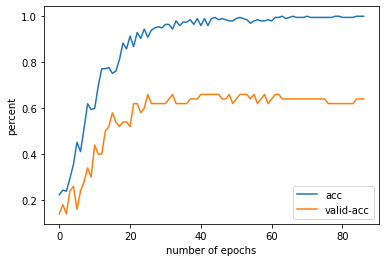

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='valid-acc')
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel("percent")


Text(0, 0.5, 'percent')

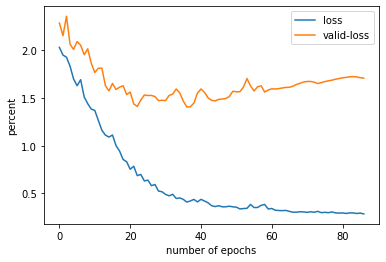

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='valid-loss')
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel("percent")

In [ ]:
pred=model.predict(x_test)

In [ ]:
y_pred=np.argmax(pred,axis=1)
y_test=np.argmax(y_test,axis=1)


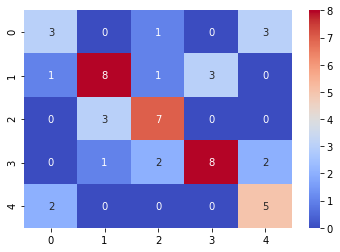

In [ ]:
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,cmap='coolwarm',linecolor='white',annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.67      0.62      0.64        13
           2       0.64      0.70      0.67        10
           3       0.73      0.62      0.67        13
           4       0.50      0.71      0.59         7

    accuracy                           0.62        50
   macro avg       0.61      0.61      0.60        50
weighted avg       0.63      0.62      0.62        50



In [ ]:
model.save("agcn-bones.h5")